# EDA images

Apziva project #4: "MonReader"<br>
2023 07 26

__Summary:__
* There are __2989 images__ showing books during a __manual browsing process__:
    * open book.
    * parts of desktop.
    * hands.
* By task design, there is an __80% vs. 20% train/test split__.
* There are __two classes__, each with similar counts (__balanced design__).

## TOC: <a class="anchor" id="TOC"></a>
* [Utilities](#Utilities)
* [General settings](#GeneralSetting)
* [Visual inspection](#VisualInspection)
* [Basic image information](#BasicImageInformation)

## Utilities <a class="anchor" id="Utilities"></a>
[TOC](#TOC)

In [1]:
# own libraries
import Utilities as u
import MachineLearning as ml

# activate changes in libraries
import importlib
importlib.reload(u)
importlib.reload(ml)

# aliases
from Utilities import TypeChecker as t
from Utilities import PrintAlias as p

## General settings <a class="anchor" id="GeneralSetting"></a>
[TOC](#TOC)

In [2]:
# constants

# general
cfltRandomSeed = 42 # any number

# files
cstrDownloadRoot = "../../OutsideRepository/ImagesRaw/"
clstrDownloadDatasets = ["training","testing"]
clstrDownloadClasses  = ["flip","notflip"]

## Visual inspection <a class="anchor" id="VisualInspection"></a>
[TOC](#TOC)

__First images of "flip" class (test dataset):__

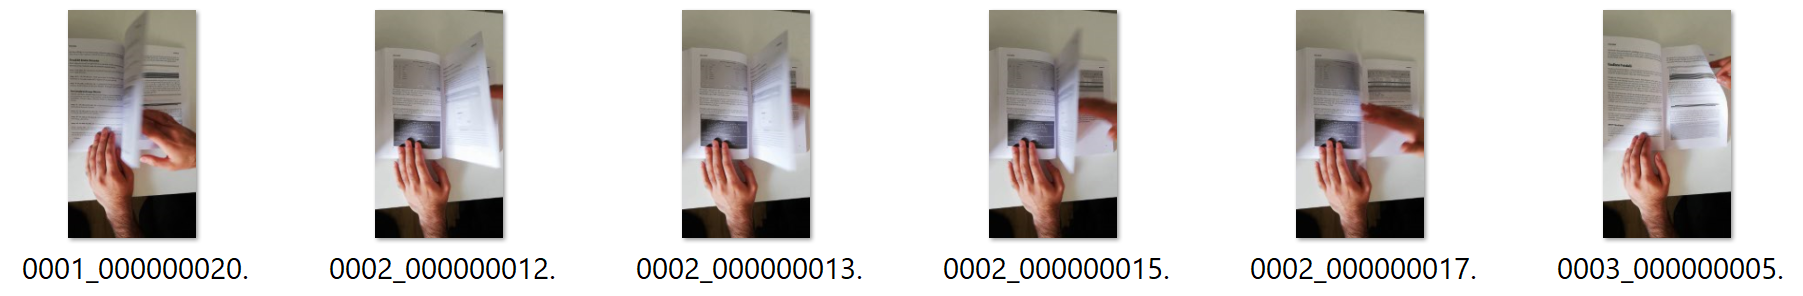

__First images of "notflip" class (test dataset):__

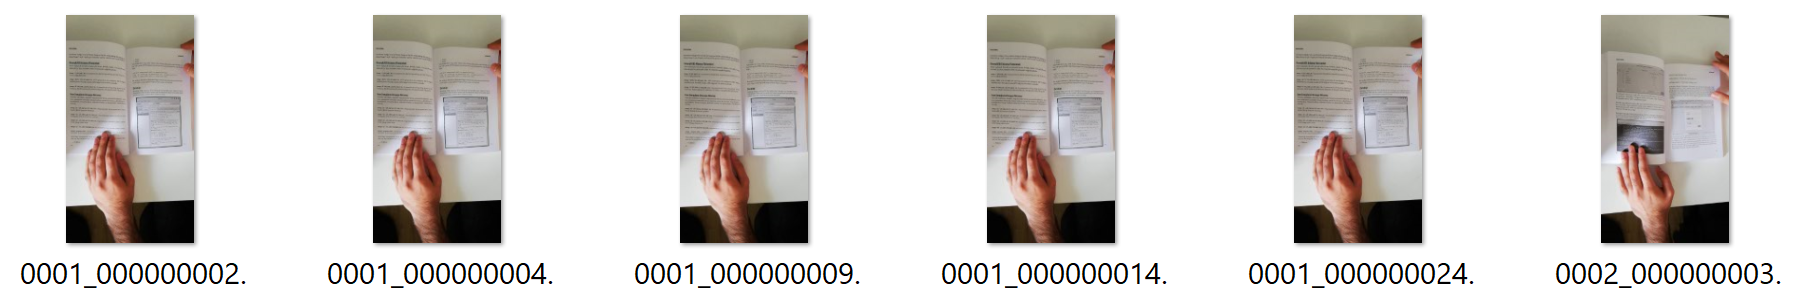

__Observations:__
* Because of the fixed camera:
    * all frames look __similar__, except for the movements of the hands and the paper.
    * the __position__ of the book __differs__ somewhat.
* The images are __rectangular__.
* All images seem to have the __same size__.
* The images are __colored__ JPG images.

## Basic image information <a class="anchor" id="BasicImageInformation"></a>
[TOC](#TOC)

__Remarks:__
* Here, images are analyzed on their __basic parameters__:
    * height, width
    * saturation, brightness
* __Only a sample__ is analyzed because of computation time.

In [7]:
from PIL import Image
import os
import pandas as pd

def SaturationAndBrightness(pilImage):
    '''
    Calculates the mean saturation and mean brightness of an image.
    
    Short variable names:
    r = fltRed
    g = fltGreen
    b = fltBlue
    minc = fltMinimumChannel
    maxc = fltMaximumChannel
    L = fltLuminance
    S = fltSaturation
    V = fltBrightness ("value")
    
    When       Who What
    2023 07 26 dh  Created
    '''
    objPixels = pilImage.convert("RGB").getdata()
    intPixels = len(objPixels)
    fltSumS = 0
    fltSumV = 0

    for r, g, b in objPixels:
        r /= 255.0
        g /= 255.0
        b /= 255.0

        maxc = max(r, g, b)
        minc = min(r, g, b)
        L = (maxc + minc) / 2.0 # mean of extreme channels

        if maxc == minc:
            S = 0 
        elif L <= 0.5:
            S = (maxc - minc) / (maxc + minc)
        else:
            S = (maxc - minc) / (2.0 - maxc - minc)

        V = maxc

        fltSumS += S
        fltSumV += V

    # means
    fltMeanS = fltSumS / intPixels
    fltMeanV = fltSumV / intPixels

    # finalize
    return fltMeanS, fltMeanV

def AnalyseImagesInPath(strPath, intSampledEvery=1):
    '''
    Analyses each jpg image in the specified path: height/width, mean saturation/brightness.
    
    When       Who What
    2023 07 26 dh  Created
    '''
    ldvarImageInformation = []
    intImage=0
    for strFilename in os.listdir(strPath):
        if strFilename.lower().endswith(".jpg"):
            if intImage % intSampledEvery == 0:
                strFilePath = os.path.join(strPath, strFilename)
                pilImage = Image.open(strFilePath)
                intWidth, intHeight = pilImage.size
                fltMeanSaturation, fltMeanBrightness = SaturationAndBrightness(pilImage)

                dvarImageInformation = {
                    "strFilename": strFilename,
                    "Height": intHeight,
                    "Width": intWidth,
                    "Mean Saturation": fltMeanSaturation,
                    "Mean Brightness": fltMeanBrightness
                }
                ldvarImageInformation.append(dvarImageInformation)
            intImage += 1

    # finalize
    dfrImageInformation = pd.DataFrame(ldvarImageInformation)
    return intImage,dfrImageInformation

cintSampledEvery = 100
p("Analyzing a sample of images".upper())
p(f"- Sampled: {round(100*1/cintSampledEvery,1)}%")
u.StopWatch()
intTotalCount = 0
for strDataset in clstrDownloadDatasets:
    for strClass in clstrDownloadClasses:   
        p()
        p(f"Dataset '{strDataset}', class '{strClass}':")
        strPath = f"{cstrDownloadRoot}{strDataset}/{strClass}/"
        intCount,dfrResults = AnalyseImagesInPath(strPath,cintSampledEvery)
        p(f"- Image count: {intCount}")
        u.DisplayDataFrame(dfrResults.describe().T[["min","50%","max"]])
        intTotalCount += intCount
p()
p(f"Total count: {intTotalCount}")
print("Time used for sample:", end="")
u.StopWatch("minutes",intDigits=1)        

ANALYZING A SAMPLE OF IMAGES
- Sampled: 1.0%

Dataset 'training', class 'flip':
- Image count: 1162


,min,50%,max
Height,1920.000000,1920.000000,1920.000000
Width,1080.000000,1080.000000,1080.000000
Mean Saturation,0.109032,0.162157,0.195544
Mean Brightness,0.537138,0.578157,0.656335



Dataset 'training', class 'notflip':
- Image count: 1230


,min,50%,max
Height,1920.000000,1920.000000,1920.000000
Width,1080.000000,1080.000000,1080.000000
Mean Saturation,0.115175,0.140166,0.203684
Mean Brightness,0.522116,0.594302,0.652629



Dataset 'testing', class 'flip':
- Image count: 290


,min,50%,max
Height,1920.000000,1920.000000,1920.000000
Width,1080.000000,1080.000000,1080.000000
Mean Saturation,0.118510,0.195474,0.202684
Mean Brightness,0.517735,0.608711,0.644587



Dataset 'testing', class 'notflip':
- Image count: 307


,min,50%,max
Height,1920.000000,1920.000000,1920.000000
Width,1080.000000,1080.000000,1080.000000
Mean Saturation,0.123242,0.150193,0.167096
Mean Brightness,0.524283,0.604886,0.632622



Total count: 2989
Time used for sample:0.9 minutes


__Observations:__
* The data set has been split into about 80% training records and 20% testing records, thus a __standard train/test split__.
* The two classes "flip" and "notflip" are __balanced__.
    * Thus, using __accuracy__ as the metric for the models would be okay.
    * The task design, however, requires to use __F1__.
* Within the sample, all images have indeed the __same height and width__ (compare visual inspection further above).
* __Saturation and brightness__ are __similar__ throughout the sample.